# DESIGN PROJECT

## Mise au point d’un système de caméra stéréoscopique pour l’estimation du débit des rivières

In [1]:
#Packages:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from camera_matrix import camera_matrix

In [2]:
#rosa:
#C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_dx - short.MP4
cap0 = cv2.VideoCapture("C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_dx - short.MP4")
cap1 = cv2.VideoCapture("C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_sx - short.MP4")

#<add code to run ffmpeg command via ssh>
#cap0 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/vid1_dx.MP4")
#cap1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/vid1_sx.MP4")


fps = cap1.get(cv2.CAP_PROP_FPS) #what does this do??



In [3]:
# Get the camera Parameters. normally only has to be done once
# We should save the parameters so we don't have to do this step every time...
mtx, newcameramtx, dist, w, h, objpoints, rvecs, tvecs, imgpoints = camera_matrix()

print("Camera Matrix:\n", mtx)
print("New Camera Matrix:\n", newcameramtx)
print("Distortion:\n", dist)
print("w:", w)
print("h:", h)

Camera Matrix:
 [[3.52546709e+03 0.00000000e+00 2.80962549e+03]
 [0.00000000e+00 3.53751668e+03 2.22828710e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
New Camera Matrix:
 [[2.69708940e+03 0.00000000e+00 2.90751046e+03]
 [0.00000000e+00 2.88604243e+03 2.51579762e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion:
 [[-0.07186645  0.11189368  0.00865094 -0.00050088 -0.10195969]]
w: 5568
h: 4176


In [4]:
# Undistort the images. This one only does it for cap0, should also be done for cap1!!

#C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_dx - short.MP4
cap0 = cv2.VideoCapture("C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_dx - short.MP4")
cap1 = cv2.VideoCapture("C:/Users/rosas/Documents/Epfl/MA_2/Design Project/Videos/vid1_sx - short.MP4")
#cap0 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/vid1_dx.MP4")
#cap1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/vid1_sx.MP4")

while cap0.isOpened():
    ret0, frame0 = cap0.read()
    if not ret0:
        print("end")
        break
    print("still going")
    bw0 = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
    
    mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
    # Initialize the undistortion map using newcameramtx
    dst0 = cv2.remap(bw0, mapx, mapy, cv2.INTER_LINEAR)
    
    cv2.imshow('video', dst0)
    
    if cv2.waitKey(int(1000 / fps)) == ord("q"):
        break

# Release the capture device and close OpenCV windows
cap0.release()
cv2.destroyAllWindows()


still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
still going
end


In [5]:
#Calculates the error of the undistortion

# Initialize lists to store error values
errors = []

# Loop over the range of available data points
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    errors.append(error)  # Store error value in the list

# Calculate mean error
mean_error = np.mean(errors)

# Calculate standard deviation
std_deviation = np.std(errors)

# Check if objpoints is not empty before printing results
if len(objpoints) > 0:
    print("Mean error: {}".format(mean_error))
    print("Standard deviation: {}".format(std_deviation))
else:
    print("No data points available. Cannot calculate mean error and standard deviation.")


Mean error: 0.2159626417832498
Standard deviation: 0.16939582790250013


In [6]:
mean_error = 0
# initialization of objpoints
objpoints = []
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
 
print( "total error: {}".format(mean_error/len(objpoints)) )

ZeroDivisionError: division by zero

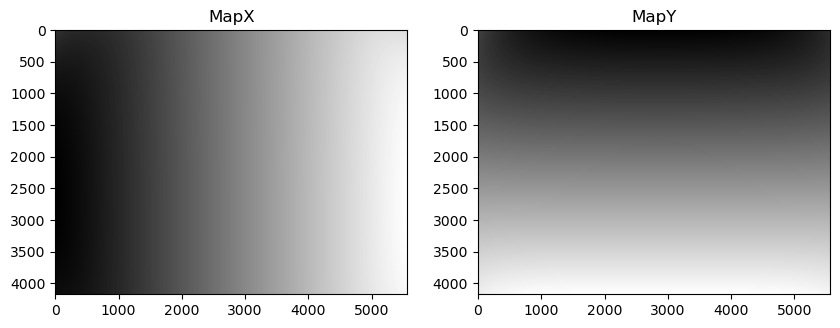

In [7]:
# Map the rectification Matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mapx, cmap='gray')
plt.title('MapX')

plt.subplot(1, 2, 2)
plt.imshow(mapy, cmap='gray')
plt.title('MapY')

plt.show()

# Stereovision


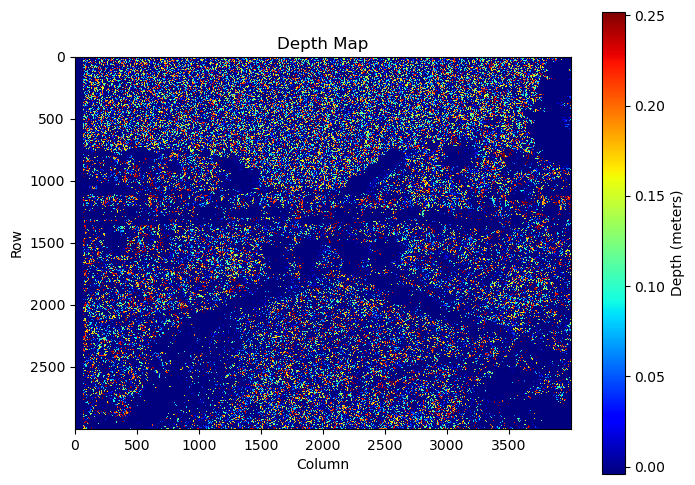

In [29]:
# Reading the left and right images.
 
imgL = cv2.imread("dx_126.jpg",0)
imgR = cv2.imread("sx_064.jpg",0)
 
# Setting parameters for StereoSGBM algorithm
minDisparity = 0;
numDisparities = 64;
blockSize = 8;
disp12MaxDiff = 1;
uniquenessRatio = 10;
speckleWindowSize = 10;
speckleRange = 8;
 
# Creating an object of StereoSGBM algorithm
stereo = cv2.StereoSGBM_create(minDisparity = minDisparity,
        numDisparities = numDisparities,
        blockSize = blockSize,
        disp12MaxDiff = disp12MaxDiff,
        uniquenessRatio = uniquenessRatio,
        speckleWindowSize = speckleWindowSize,
        speckleRange = speckleRange
    )
 
# Calculating disparith using the StereoSGBM algorithm
disp = stereo.compute(imgL, imgR).astype(np.float32)
disp = cv2.normalize(disp,0,255,cv2.NORM_MINMAX)
 
# Displaying the disparity map
cv2.imshow("disparity",disp)
cv2.waitKey(0)
# Plot the disparity map
plt.figure(figsize=(8, 6))
plt.imshow(disp, cmap='jet', interpolation='nearest')
plt.colorbar(label='Depth (meters)')
plt.title('Depth Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [12]:
# Perform rectification
Left_nice = cv2.remap(imgL, mapx, mapy, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
Right_nice = cv2.remap(imgR, mapx, mapy, cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)

# Convert grayscale images to color (replicate intensity values across all channels)
Left_nice_color = cv2.cvtColor(Left_nice, cv2.COLOR_GRAY2BGR)
Right_nice_color = cv2.cvtColor(Right_nice, cv2.COLOR_GRAY2BGR)

# Display rectified images
cv2.imshow("Left image after rectification", Left_nice_color)
cv2.imshow("Right image after rectification", Right_nice_color)
cv2.waitKey(0)

# Use one of the rectified images as output
out = Left_nice_color  # Using left image as output
cv2.imshow("Output image", out)
cv2.waitKey(0)
cv2.destroyAllWindows()


-1

In [25]:
# Compute baseline distance (assuming known baseline distance)
baseline = 5  #  actual baseline distance in meters

# Compute focal length
focal_length = mtx[0, 0]  # Focal length is the first element of the first row of the camera matrix


print("Baseline Distance:", baseline)
print("Focal Length (pixels):", focal_length)

# Calculate depth from disparity
depth = baseline * focal_length / disp

# Display the depth map
cv2.imshow("depth map", depth)
cv2.waitKey(0)
cv2.destroyAllWindows()



Baseline Distance: 5
Focal Length (pixels): 3525.4670854021456


C:\Users\rosas\AppData\Local\Temp\ipykernel_22560\2831850999.py:12: RuntimeWarning: divide by zero encountered in divide
  depth = baseline * focal_length / disp


In [26]:
depth

array([[-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf],
       [-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf],
       [-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf],
       ...,
       [-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf],
       [-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf],
       [-4407192.5, -4407192.5, -4407192.5, ...,        inf,        inf,
               inf]], dtype=float32)

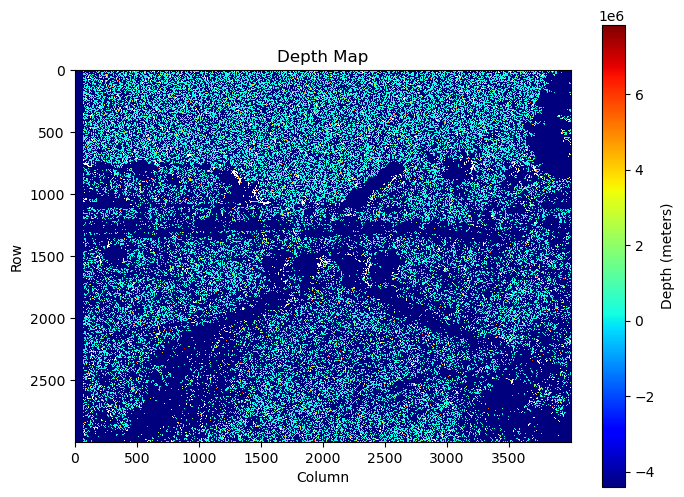

In [28]:
# Plot the depth map
plt.figure(figsize=(8, 6))
plt.imshow(depth, cmap='jet', interpolation='nearest')
plt.colorbar(label='Depth (meters)')
plt.title('Depth Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()